
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100K medical appointments is Barazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included is each row.

### Dataset Description 

**Patient_id**: Identification of a patient.

**Appointment_id**: Identification of each appointment.

**Gendar**: M = Male & F = Female.

**Appointment_Day**: The day of the actual appointment. 

**Scheduled_Day**: Tell us on what day the patient set up their appointment.

**Age**: Old of the Patient.

**Neighbourhood**: Indicates the location of the hospital.

**Scholarship**: Indicates whether or not the patient is enrolled in 
Barasilian welfare program (Yes = 1 / No = 0).

**Hypertension**: Indicates whether the Patient has a high blood pressure (Yes = 1 / No = 0).

**Diabetes**: Indicates if the patient has diabetes (Yes = 1 / No = 0)

**Alcoholism**: Indicates if the patient has an addication to drinking alcohol (Yes = 1 / No = 0).

**Handicap**: Indicates if the patient has physical disability (Yes = 1 / No = 0)

**SMS_received**: Indicates if the patient received SMS message (Yes = 1 / No = 0).

**show**: Indicates if the patient showed up (Yes = 1 / No = 0).



### Question(s) for Analysis

1-What is the percentage of the patients who showed up vs. those who didn't?

2-Is there a gender that has more commitment to appointments more than the other one?

3-Is there any relationship between the age of patients and show up?

4-Are patients who received SMS to remind them of the appointment more likely to show up?

5-Where are the most appointments that take?

6-Dose the type of disease or scholarship affect the show up of patients?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Upgrade pandas to use dataframe.explode() function.

In [ ]:
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Read the data file by pandas and display the first 5 rows.

In [2]:
df = pd.read_csv('noshowappointments.csv') 
df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**.** There are wrong spelling in the column names.

**.** Paraphrasing some column names so that they are consistent.

**.** Convert (ScheduledDay & AppointmentDay) columns into data time.

Display all data information useing .info() function code.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Display data describe to know (count , mean , min ,max , Q1 ,Q2,Q3),use .describe() funcation.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can know how is the data big by know how many rows & columns in our data. use shape() funcation.

In [5]:
df.shape

(110527, 14)

We need to know if we have any mising date in our dataframe used isnull() funcation.

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It's important to know the count of duplicated value in our data.

In [7]:
df.duplicated().sum()

0

**Summary:**

**.** There is no missing data.

**.** PatientId data type is float, it's should be int.

**.** In Age column there is (-1) value.

**.** In Handcap column there arev alus = (4).

**.** There is no duplicated values.



### Data Cleaning

**Rename and Paraphrasing some columns name**

to be clear and showing well.

To do that i use rename code to change it.

In [8]:
df.rename(columns={'PatientId':'Patient_id','AppointmentID':'Appointment_id','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day','Handcap':'Handicap','Hipertension':'Hypertension','No-show':'Show'}, inplace=True)
df.columns

Index(['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Show'],
      dtype='object')

**Changed values and rename No-show to be Show column and change the value of it to be easler view and clear.**

In [9]:
df['Show'] = df['Show'].replace({'Yes': 0, 'No': 1})

df['Show'].value_counts()

1    88208
0    22319
Name: Show, dtype: int64

**Convert (Scheduled_day & Appointment_Day) to date time and print the first rows to display our change.**

In [10]:

df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df.head()

,Patient_id,Appointment_id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


**Access to all Age value less than 0 because the min in Age column -1 as we displayed before and ther is no sance if the age equal (-) value**

In [11]:
df.query('Age < 0')

,Patient_id,Appointment_id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1


**it's showing just one row in the data we need to remove it and check the Age min**

In [12]:
df = df.query('Age >= 0')
df['Age'].min()

0

**Remove Handicap values equal other that 0 or 1 and display the describe or the max in handicap column**

In [13]:
df = df[(df['Handicap'] == 0) | (df['Handicap'] == 1)]
df.describe()

,Patient_id,Appointment_id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.798073
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Change data type for patient_id to (int) as should be because there is o sance if the id value including to float value**

In [14]:
df['Patient_id'] = df['Patient_id'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         110327 non-null int64
Appointment_id     110327 non-null int64
Gender             110327 non-null object
Scheduled_Day      110327 non-null datetime64[ns]
Appointment_Day    110327 non-null datetime64[ns]
Age                110327 non-null int64
Neighbourhood      110327 non-null object
Scholarship        110327 non-null int64
Hypertension       110327 non-null int64
Diabetes           110327 non-null int64
Alcoholism         110327 non-null int64
Handicap           110327 non-null int64
SMS_received       110327 non-null int64
Show               110327 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 12.6+ MB


Chack again if there are any duplicated value after our clean up.

In [15]:
df.duplicated().sum()

0

For more information we can print out the uniqe value for each columns. 

In [16]:
df.nunique()

Patient_id          62190
Appointment_id     110327
Gender                  2
Scheduled_Day      103368
Appointment_Day        27
Age                   103
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handicap                2
SMS_received            2
Show                    2
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### 1- What is the Percentage of Patients between, who showed up and those who didn't?

I need first to know the highest percentage patients are show up or didn't.

I can know that by using plt.pie for count value (show) to view that. 

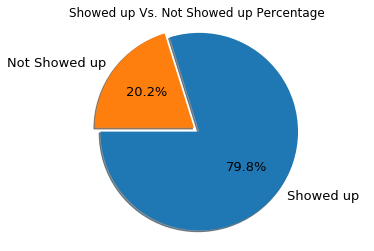

In [17]:
data = df['Show'].value_counts()
labels = ['Showed up' , 'Not Showed up']
explode = (0, 0.10)
plt.pie(data,radius=1.5,labels=labels,explode=explode, startangle=180,autopct='%0.1f%%',textprops ={'fontsize':13},shadow=True)
plt.title('Showed up Vs. Not Showed up Percentage')
plt.axis('equal');


Showed up patients are highest that not showed up.

### 2- Is there a gender that has more commitment to appointment more than the other one?

This question will help us to know :

1-what is the highest patients gender?

2-Is there relationship between the kind gender and show up?.

Firstly i use plt.pie to view the count patients gender in the dataframe (gender).and print out as a percentage. 

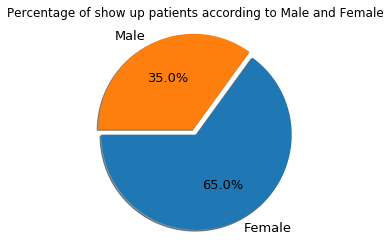

In [18]:
data_gender = df['Gender'].value_counts()
labels = ['Female', 'Male']
plt.pie(data_gender,radius=1.5,labels=labels,explode=explode,startangle=180,autopct='%0.1f%%',textprops={'fontsize':13},shadow=True)
plt.title('Percentage of show up patients according to Male and Female')
plt.axis('equal');

Female patients was registered apointments more than the male patients.

Secondly, compare them among show up and gender.

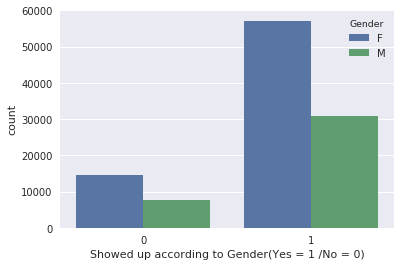

In [19]:
sns.set(style='darkgrid')
sns.countplot(x=df['Show'],hue='Gender',data=df)
plt.xlabel('Showed up according to Gender(Yes = 1 /No = 0)');

I use plot visualization to show the compare.

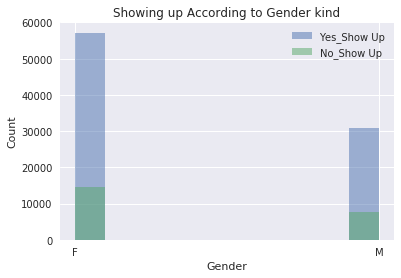

In [30]:
plot_hist('Gender')
plt.xlabel('Gender')
plt.title('Showing up According to Gender kind');

Gender didn't affect whether patients show up or not.

### 3- Is there any relationship between the Age of patients and showed up?

this question will help us to know:

1- what is the patients average age?. 

2- Determine the age group of patients.

3- what is the age group most show up among patients?.

I write one function to help me to display the compare between the patients who showing up and those didn't according to the Age.


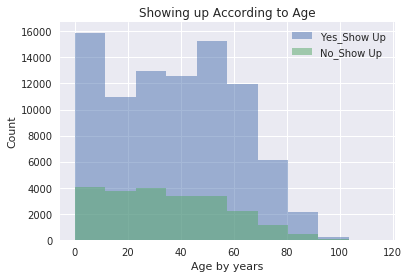

In [21]:
yes_show = df['Show'] == 1
no_show = df['Show'] == 0
def plot_hist(column):
    df[column][yes_show].hist(alpha=0.5,label='Yes_Show Up').set_ylabel('Count')
    df[column][no_show].hist(alpha=0.5,label='No_Show Up')
    plt.xlabel('Age by years')
    plt.title('Showing up According to Age')
    plt.legend();
plot_hist('Age') 


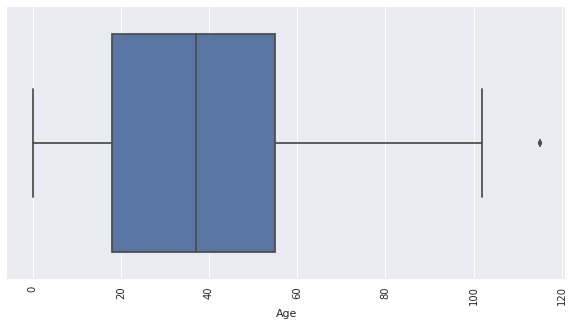

In [22]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
df_age = sns.boxplot(x=df['Age'])

I use boxplot fo (age) to know average age and the age group.

The Average of patients Age is around 37 years.

50% of the patients are between 18-55 years.

I will use countplot form dataframe (age & show)to know which age group more committed to their appointments.

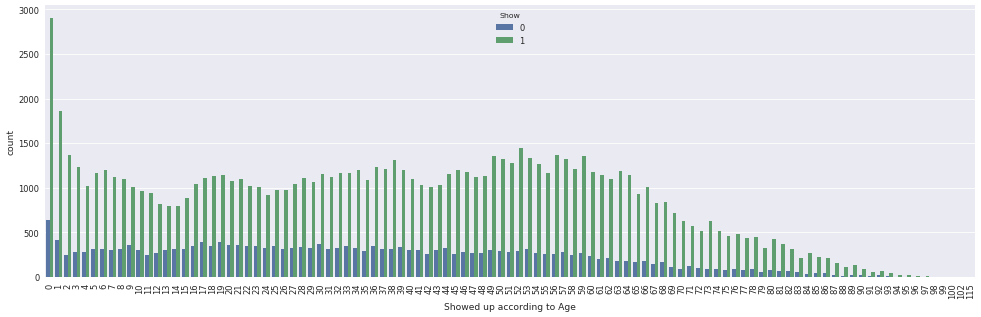

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,6),dpi=60)
sns.countplot(x=df['Age'],hue='Show',data=df)
plt.xticks(rotation=90)
plt.xlabel('Showed up according to Age');

The older patients are more committed to their appointments more than the younger.

### 4- Are Patients who received SMS to remind them of the appointment more likely to show up? 

This question will show us if the patients received remind SMS showed up more than the other or not. 

To do that i will first print out the percentage for each of them (who received / those who didn't),using plt.pie for (SMS_Received & show)count from the dataframe.

and after that i will compare it with show up patients.

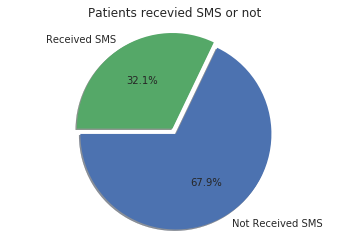

In [24]:
data_sms = df['SMS_received'].value_counts()
labels = ['Not Received SMS','Received SMS']
explode = (0,0.10)
plt.pie(data_sms,radius=1.5,labels=labels,explode=explode,startangle=180,autopct='%0.1f%%',shadow=True,textprops={'fontsize':10})
plt.title('Patients recevied SMS or not')
plt.axis('equal');

67.9% of the patients not received SMS

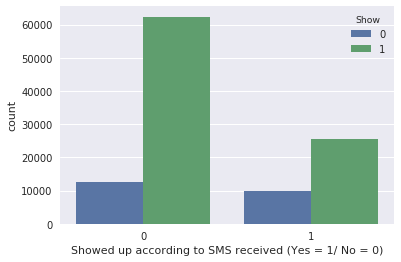

In [25]:
sns.set(style='darkgrid')
showed_up = df
sns.countplot(x=df['SMS_received'],hue='Show',data=df)
plt.xlabel('Showed up according to SMS received (Yes = 1/ No = 0)');

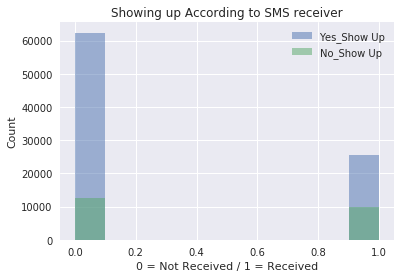

In [26]:
plot_hist('SMS_received')
plt.xlabel('0 = Not Received / 1 = Received')
plt.title('Showing up According to SMS receiver');

Here i used the previous function code to display the plot. Just spicifice the dataframe to be analyzed.

No affect, if the patient received SMS to show up or not.

### 5- Where are the most appointments that take ?

This Question will help us to check if there a specific  neighbourhood patients didn't showing up significantly.

To answer this question i will used countplot(neighbourhood & show) in the dataframe to view the all neighbourhoods compare with the patients not show up.

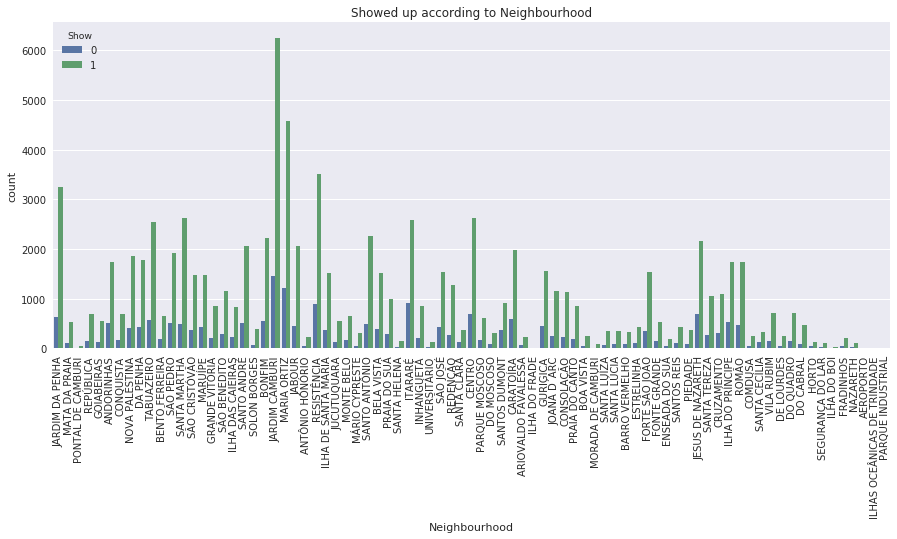

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['Neighbourhood'],hue=df['Show'])
plt.xticks(rotation=90)
plt.title('Showed up according to Neighbourhood');


'JARDIM CAMBURI' it's the most neighbourhood have patients an appointment,so it's the most neighbourhood have a highest non showed up patients.

If there a distance data between the neighbourhood and hospital maybe we can investigate the reason of show up / didn't patients according to the distance. 

### 6- Dose the tyoe of disease or scholarship affect the show up of patients?

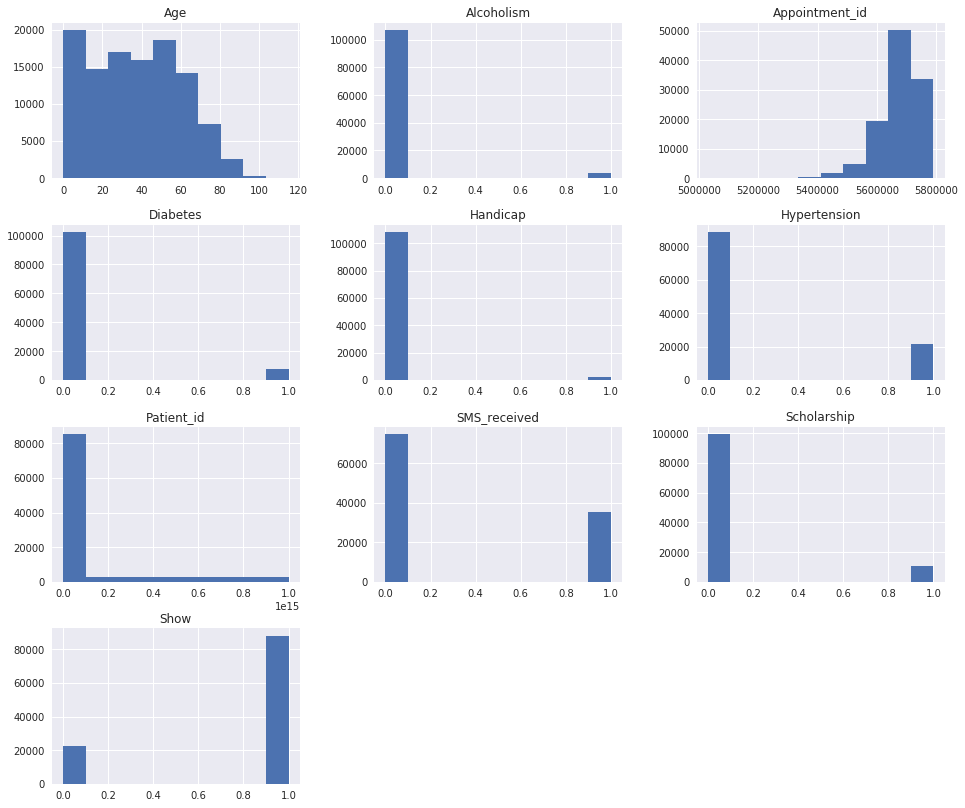

In [28]:
df.hist(figsize=(16,14));


*Most of the patients not enrolled in Brasilian scholarship program ,so it's ineffective to show up.

*Handicap is the lowest patients diseases and hypertension is the highest between them. 

*Alcoholism patients are ineffective for show up to appointment.

<a id='conclusions'></a>
## Conclusions

**Result:**

*Percentage of patients who show up is 79.8% and who didn't show up is 20.2%.

*Gender didn't affect the show up patients or not.

*Female patients were registered appointments more than the male patients (maybe because the females are mothers and care about children).

*The average of patients is 37 years and 50% of the patients are between 18 to 55 years,so the older patients are more committed to their appointment more than the younger.

*67.9% of the patients are not received SMS,and this didn't affect the show up of ppatients.

*'JARDIM CAMBURI' neighborhood have the most patients and appointments,so it have the highest not show up patients in general.  

*Most of the patients are not enrolled in the Brazilian scholarship program,and this didn't affect the show up of patients or not. 

**Limitation:**

*some of the source data are missing like in the Age column some of the wrong valus (-1) and not clear like (0) we need to to add at least age by months and years, and data not included the distance between the patient and the hospital.

*We can't get the clear reasone for no show patients with this data.


In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0